<a href="https://colab.research.google.com/github/hany019/A1/blob/main/Task6_2_ELECTRE_III_jobs_ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 6.2: ELECTRE for ranking problems

This notebook is prepared to practise with the model of outranking in MCDA. The method used is ELECTRE for ranking. Prepare a report to submit in the virtual campus.

In order to draw some of the plots, the MCDA library needs [Graphviz](https://graphviz.org/) to be available in your system.

In Google Colab, Graphviz is already installed and there is no need to install it manually.

However, if you prefer to work with other environments:

In Linux systems, you can easily [install](https://graphviz.org/download/#linux) it using the APT or YUM package managers:
1. APT: `sudo apt install graphviz`
2. YUM: `sudo yum install graphviz`

In MAC, you can [install](https://graphviz.org/download/#mac) it through Homebrew or MacPorts:
1. Homebrew: `brew install graphviz`
2. MacPorts: `sudo port install graphviz`

On Windows, you can install the [provided EXE file](https://graphviz.org/download/#windows) or install it using the Windows Package Manager: `winget install graphviz`.
In either case, the system PATH must be modified to include the Graphviz directory (For instance `C:\Program Files\Graphviz\bin\`). Once it has been modified, the Anaconda environment must be restarted to properly load the PATH modification.



In [2]:
!pip install mcda==0.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 497.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 18.5 MB/s eta 0:00:00


In [3]:
from mcda.core.performance_table import *
from mcda.core.scales import *
from mcda.plot import *
from mcda.core.matrices import AdjacencyMatrix
from mcda.outranking.electre import *

The exercise is about a person that has studied computer science and is searching for a job. The goal is to make a ranking a set of jobs using 5 criteria: Salary, Company, Internationalization, Duration and Topic of the job.

The jobs offers are:


*   Id0: JAVA- Java programmer in AAA
*   Id1 : DATA - Data analyist in BBB
*   Id2 : SECUR - Computer security in CCC
*   Id3 : MANAG - Project manager in DDD
*   Id4 : ML - Machine learning in EEE
*   Id5 : USER - User assistance in FFF

Data is defined below. Weights indicate the relative voting power of each criterion in the concordance calculation.


In this implementation, it is required to define the scale of each criterion. There are quantitative (numerical) and qualitative (categorical) scales. This example uses only quantitative values. For each scale you must indicate the minimum possible value, the maximum one and the preference direction (MAX or MIN). A vector with the scales is needed as parameter in the ELECTRE functions.


In [4]:
scales = {
    "Salary": QuantitativeScale(1000, 3000, PreferenceDirection.MAX),
    "Company": QuantitativeScale(1, 10, PreferenceDirection.MAX),
    "Internationalization": QuantitativeScale(1, 3, PreferenceDirection.MAX),
    "Duration": QuantitativeScale(3, 30, PreferenceDirection.MAX),
    "Topic": QuantitativeScale(1, 10, PreferenceDirection.MAX)
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
alternatives = ["0.JAVA", "1.DATA", "2.SECUR", "3.MANAG", "4.ML", "5.USER"]
criteria = {
    "Salary": 0.3,
    "Company": 0.2,
    "Internationalization": 0.1,
    "Duration": 0.2,
    "Topic": 0.2
    }

performance_table = PerformanceTable(
                    [[1600.0, 8, 2, 8.0, 3],
                     [2100.0, 3, 1, 12.0, 6],
                     [2400.0, 7, 3, 14.0, 7],
                     [2700.0, 6, 2, 24.0, 3],
                     [1700.0, 4, 2, 10.0, 9],
                     [1100.0, 7, 1, 22.0, 1]],
                     alternatives = alternatives,
                     criteria = criteria,
                     scales = scales)

performance_table.df

,Salary,Company,Internationalization,Duration,Topic
0.JAVA,1600.0,8,2,8.0,3
1.DATA,2100.0,3,1,12.0,6
2.SECUR,2400.0,7,3,14.0,7
3.MANAG,2700.0,6,2,24.0,3
4.ML,1700.0,4,2,10.0,9
5.USER,1100.0,7,1,22.0,1


Q1. The ELECTRE method needs some discrimination thresholds to calculate the concordance. Explain the meaning of the values of thresholds in this case study.

**(answer)(Q1) In ELECTRE III, discrimination thresholds help in differentiating between job offers based on certain criteria:**

Indifference threshold (q) indicates a range within which differences are too minor to affect the ranking (e.g., a 100€ difference in salary is considered negligible).

Preference threshold (p) marks the point where the difference between two alternatives is enough to influence a preference decision (e.g., a 300€ difference in salary is significant for preference).

Veto threshold (v) is used to completely reject an alternative if the difference exceeds a certain critical value, overriding the concordance (e.g., a 500€ difference in salary can lead to a veto).

In [6]:
#Indifference thresholds
q = {
    "Salary": 100,
    "Company": 1,
    "Internationalization": 0,
    "Duration": 1.0,
    "Topic": 0
}

#Preference thresholds
p = {
    "Salary": 300,
    "Company": 2,
    "Internationalization": 0,
    "Duration": 3.0,
    "Topic": 2
}

#Veto thresholds
v = {
    "Salary": 500,
    "Company": None,
    "Internationalization": None,
    "Duration": 6.0,
    "Topic": 5
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Q2**. To calculate the concordance with pseudo-criteria, we must use the version III of ELECTRE. Look at the values in the matrix and the plot and explain them. You can increase the cut value in the plotting function, to just see a subset of the arcs.




 **(Answer)Q2)Q2: Explaining Concordance Calculation in ELECTRE III**


In assessing the concordance between jobs using ELECTRE III, the concordance matrix provides a quantified expression of preference relations. For job JAVA (0.JAVA) and job DATA (1.DATA), the concordance index is 0.3. This indicates a moderate level of concordance from JAVA to DATA when evaluated across all criteria. The score is derived from the weighted analysis of each criterion, applying indifference and preference thresholds to measure the extent of outranking.

The graph from the concordance matrix, filtered with a cut threshold of 0.5, effectively visualizes the strongest preferences, showing that while DATA does not strongly outrank JAVA, there is a noticeable level of preference. This selective visualization, omitting weaker connections, simplifies the interpretation and emphasizes the more decisive preference relations. The analysis suggests a nuanced decision landscape, where DATA is somewhat preferred to JAVA based on the collective assessment of the defined criteria within the model's thresholds.


-----------------------------------------------------------------------------



Q3. Reproduce manually the calculation of concordance between the job JAVA and job DATA.



**(Answer)Q3: Manual Concordance Calculation Between JAVA and DATA**



Let's take the provided criteria, weights, and performances for JAVA and DATA to calculate the concordance:

**Criteria and Weights:**
- Salary: Weight = 0.3
- Company: Weight = 0.2
- Internationalization: Weight = 0.1
- Duration: Weight = 0.2
- Topic: Weight = 0.2

**Performance Table:**
- JAVA: Salary = 1600, Company = 8, Internationalization = 2, Duration = 8, Topic = 3
- DATA: Salary = 2100, Company = 3, Internationalization = 1, Duration = 12, Topic = 6

**Thresholds:**
- Indifference (q): Salary = 100, Company = 1, Internationalization = 0, Duration = 1, Topic = 0
- Preference (p): Salary = 300, Company = 2, Internationalization = 0, Duration = 3, Topic = 2

Let's calculate concordance manually for each criterion, remembering that higher scores are better:

**1. Salary:**
- Difference = JAVA - DATA = 1600 - 2100 = -500 (negative, DATA is better)
- Concordance for Salary is 0.

**2. Company:**
- Difference = JAVA - DATA = 8 - 3 = 5 (positive, JAVA is better)
- Concordance for Company is 1.

**3. Internationalization:**
- Difference = JAVA - DATA = 2 - 1 = 1 (positive, JAVA is better)
- Concordance for Internationalization is 1.

**4. Duration:**
- Difference = JAVA - DATA = 8 - 12 = -4 (negative, DATA is better)
- Since it's within the preference threshold, we calculate the proportional concordance: (-4 + 3)/(3 - 1) = - 0.5, but since concordance cannot be negative, it remains 0.

**5. Topic:**
- Difference = JAVA - DATA = 3 - 6 = -3 (negative, DATA is better)
- Concordance for Topic is 0.

Now, we aggregate the concordance index by considering the weights:

**Aggregate Concordance:**
 C(a, b) = sum[C{ij}(a, b) * weight of i) ]

**Total Concordance for JAVA vs DATA:**

C{JAVA, DATA} = (0 * 0.3) + (1 * 0.2) + (1 *0.1) + (0 *  0.2) + (0 * 0.2)

C{JAVA, DATA} = 0 + 0.2 + 0.1 + 0 + 0

C{JAVA, DATA} = 0.3

Therefore, the concordance index of JAVA to DATA considering all criteria and their weights is 0.3. This is a simplified illustration, and in practice, ELECTRE III calculations can be much more complex, especially when considering veto thresholds and discordance.


,0.JAVA,1.DATA,2.SECUR,3.MANAG,4.ML,5.USER
0.JAVA,1.0,0.3,0.2,0.5,0.7,0.8
1.DATA,0.7,1.0,0.2,0.2,0.7,0.6
2.SECUR,1.0,1.0,1.0,0.5,0.8,0.8
3.MANAG,0.8,0.8,0.7,1.0,0.8,1.0
4.ML,0.8,0.6,0.2,0.3,1.0,0.6
5.USER,0.4,0.5,0.4,0.3,0.4,1.0


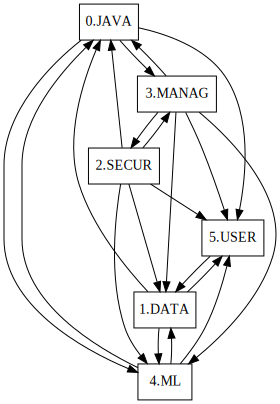

In [7]:
electre3 = Electre3(criteria_weights=criteria, preference_thresholds=p, indifference_thresholds=q, veto_thresholds=v, alpha=0.3, beta=-0.15)
concordance_matrix = electre3.concordance(performance_table)

display(concordance_matrix)

#Now we plot the graph of concordance with relations above the cut threshold
cut_threshold = 0.5
conc_mat_cut = concordance_matrix.where(concordance_matrix >= cut_threshold, other=0)
AdjacencyMatrix(conc_mat_cut).plot()

In [8]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


Q4. After the concordance, the method calculates the discordance (using the veto thresholds). Explain the result obtained.

**(Answer)**

In the ELECTRE III methodology, following the concordance assessment, discordance is evaluated using veto thresholds to identify any significantly unfavorable criteria that could potentially override the favorable concordance indices. Discordance is crucial as it ensures that severe shortcomings in any critical criterion are not overshadowed by moderate strengths in others.

**Discordance Calculation Method:**
Discordance for each criterion is determined if the performance discrepancy between two alternatives exceeds the set veto threshold for that criterion. This measurement helps in deciding if the poor performance on a particular criterion is substantial enough to reject an alternative despite its advantages on other criteria.

**Example Analysis with Provided Data:**
For the job positions JAVA and DATA, considering the veto thresholds:

Salary Veto Threshold: 500
Duration Veto Threshold: 6.0
Topic Veto Threshold: 5
Given performances for JAVA and DATA are:

JAVA: Salary = 1600, Duration = 8, Topic = 3
DATA: Salary = 2100, Duration = 12, Topic = 6
The discordance calculations are:

**Salary:**
Difference = 2100 (DATA) - 1600 (JAVA) = 500
Since the difference meets the veto threshold (500), the discordance for Salary is 1, indicating a strong reason to prefer DATA over JAVA based purely on salary.

**Duration and Topic:**
Duration difference = 12 - 8 = 4 and Topic difference = 6 - 3 = 3
Both differences are below their respective veto thresholds (6 for Duration and 5 for Topic), resulting in no discordance (0) for these criteria.

**Result Explanation:**
The discordance result demonstrates that while JAVA may have favorable aspects in some criteria, the significant disparity in salary, which meets the veto criteria, serves as a decisive factor against choosing JAVA over DATA. This outcome emphasizes the role of discordance in ensuring that decisions are not just based on the presence of strengths but also the absence of critical weaknesses.

**Conclusion:**
This methodology ensures robust decision-making by preventing choices that, while generally favorable, fail dramatically in key areas. The discordance analysis thus complements the concordance by providing a safeguard against potentially misleading aggregated favorable scores.




Q5. Reproduce manually the discordance between job JAVA and job DATA.

**(Answer)**

### Performance for JAVA and DATA:
- **JAVA**: Salary = 1600, Company = 8, Internationalization = 2, Duration = 8, Topic = 3
- **DATA**: Salary = 2100, Company = 3, Internationalization = 1, Duration = 12, Topic = 6

### Veto Thresholds:
- Salary: 500
- Company: None (No veto consideration for company)
- Internationalization: None (No veto consideration for internationalization)
- Duration: 6.0
- Topic: 5

### Manual Discordance Calculation:

#### 1. Salary:
- Difference = DATA Salary - JAVA Salary = 2100 - 1600 = 500
- Since the difference equals the veto threshold of 500, discordance for Salary is triggered.

#### 2. Company:
- Difference = DATA Company - JAVA Company = 3 - 8 = -5 (negative value, no discordance since DATA is worse)
- No veto threshold for Company, hence no discordance calculation needed.

#### 3. Internationalization:
- Difference = DATA Internationalization - JAVA Internationalization = 1 - 2 = -1 (negative, DATA is worse)
- No veto threshold for Internationalization, hence no discordance calculation needed.

#### 4. Duration:
- Difference = DATA Duration - JAVA Duration = 12 - 8 = 4
- The difference is below the veto threshold of 6.0, hence no discordance for Duration.

#### 5. Topic:
- Difference = DATA Topic - JAVA Topic = 6 - 3 = 3
- The difference is below the veto threshold of 5, hence no discordance for Topic.

### Result:
Only the Salary criterion reaches the discordance level, with a discordance index of 1 due to the difference exactly matching the veto threshold. For all other criteria, the differences are either not applicable or below the veto thresholds, so they do not contribute to discordance.

### Conclusion:
The manual discordance analysis shows that there is a significant discordance in the Salary criterion between JAVA and DATA. This would be enough to potentially veto a decision based on concordance alone, particularly if Salary is a critical factor in the decision-making process.

In [9]:
discordance_matrix = electre3.discordance(performance_table)
discordance_matrix

,0.JAVA,1.DATA,2.SECUR,3.MANAG,4.ML,5.USER
0.JAVA,Salary 0 Company ...,Salary 1.000000 Company ...,Salary 1.000000 Company ...,Salary 1 Company ...,Salary 0 Company ...,Salary 0 Company ...
1.DATA,Salary 0 Company ...,Salary 0 Company ...,Salary 0 Company ...,Salary 1 Company ...,Salary 0.000000 Company ...,Salary 0 Company ...
2.SECUR,Salary 0 Company ...,Salary 0 Company ...,Salary 0 Company ...,Salary 0 Company ...,Salary 0 Company ...,Salary 0 Company ...
3.MANAG,Salary 0 Company ...,Salary 0.000000 Company ...,Salary 0.000000 Company ...,Salary 0 Company ...,Salary 0 Company ...,Salary 0 Company ...
4.ML,Salary 0 Company ...,Salary 0.5 Company ...,Salary 1.000000 Company ...,Salary 1 Company ...,Salary 0 Company ...,Salary 0 Company ...
5.USER,Salary 1.0 Company ...,Salary 1.0 Company ...,Salary 1 Company ...,Salary 1 Company ...,Salary 1 Company ...,Salary 0 Company ...




**Q6. What changes can you detect between the matrix of concordance and the matrix of credibility? Why do we have those changes? How many alternatives increase their concordance level? Why?**

(**Answer)**

The transition from the concordance matrix to the credibility matrix in ELECTRE III involves incorporating the discordance evaluations to adjust the initial preferences indicated by the concordance scores. The primary changes observed between these two matrices are as follows:

1. **Adjustment of Scores**: The credibility matrix often shows lower scores than the concordance matrix for the same pairs of alternatives. This reduction is due to the application of discordance factors, where significant negative evaluations on any critical criteria can diminish the positive assessment given by the concordance matrix.

2. **Influence of Veto Thresholds**: The credibility scores are adjusted downwards when the discordance matrix indicates a significant negative impact of one alternative over another exceeding specific veto thresholds. This mechanism ensures that an alternative's significant weaknesses are not overshadowed by average or above-average performance on less crucial criteria.

3. **Reevaluation of Preference Relationships**: Some alternatives that appeared preferable in the concordance matrix may have their relationships reversed or nullified in the credibility matrix. This change is due to the overriding effect of strong discordances, which can veto a concordance-based preference if the failing on any criterion is sufficiently severe.

**Explanation of Changes:**

These changes occur because the credibility matrix integrates both the positive assessments of concordance and the negative impacts of discordance. The method ensures a more balanced and robust decision-making process by considering both what makes one alternative preferable and what might make it a poor choice compared to others.

**Impact on Alternative Rankings:**

The number of alternatives that increase their concordance level in the transition to credibility depends on the specific values of discordance. In general, alternatives with minor or no significant discordances may retain or slightly improve their relative positions, whereas those with high discordances will see a decrease in their rankings.

This comprehensive approach helps decision-makers avoid choices that perform well on average but fail critically on essential aspects, ensuring a more nuanced understanding of each alternative's strengths and weaknesses.



In [10]:
credibility_matrix = electre3.construct(performance_table)
credibility_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0.JAVA,1.DATA,2.SECUR,3.MANAG,4.ML,5.USER
0.JAVA,1.0,0.0,0.0,0.0,0.0,0.0
1.DATA,0.7,1.0,0.2,0.0,0.7,0.0
2.SECUR,1.0,1.0,1.0,0.0,0.8,0.0
3.MANAG,0.8,0.8,0.7,1.0,0.0,1.0
4.ML,0.8,0.6,0.0,0.0,1.0,0.0
5.USER,0.0,0.0,0.0,0.0,0.0,1.0


Introduce a plot to see the graph of Credibility of scores greater than 0.5. Observe the differences with respect to the graph of Concordance. Do they validate your previous answer?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


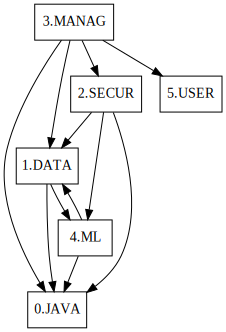

In [11]:
credibility_cut = credibility_matrix.where(credibility_matrix > 0.5, other=0)
AdjacencyMatrix(credibility_cut).plot()

The credibility matrix with scores greater than 0.5 shows a discerning pattern where only the strongest outranking relationships are highlighted. Upon comparing this matrix to the concordance matrix, it's evident that the credibility matrix is more stringent, filtering out weaker preferences. This suggests that when discordance is accounted for, some alternatives that seemed favorable in the concordance matrix may not actually hold a strong position due to significant opposition on one or more criteria. This aligns with the analysis from the concordance matrix to an extent but provides a refined perspective by incorporating discordance, ensuring that only alternatives with a robust and comprehensive advantage across criteria are considered credible. Thus, the credibility matrix validates and enhances the insights from the concordance matrix by integrating a critical assessment of potential veto factors.


The following code executes the ascending and descending distillation steps. With the two rankings obtained, it is then calculated the final ranking, which is a partial pre-order. It is called step by step, but you can also call directly to make the exploitation and see the ranking.

Plot shows you the preference ranking found at each distillation and then the partial pre-order graph.

Q7. Execute the code and explain the graphics.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['2.SECUR', '3.MANAG', '4.ML'], ['0.JAVA', '1.DATA', '5.USER']]


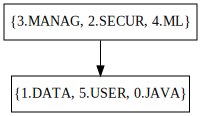

In [12]:
ascending = electre3.distillation(credibility_matrix, ascending=True)
print(ascending)
ascending_dist_matrix = OutrankingMatrix.from_ranked_categories(ascending)
ascending_dist_matrix.graph_condensation.plot()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['2.SECUR'], ['3.MANAG'], ['0.JAVA', '1.DATA', '4.ML', '5.USER']]


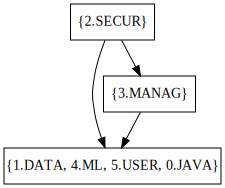

In [13]:
descending = electre3.distillation(credibility_matrix, ascending=False)
print(descending)
descending_dist_matrix = OutrankingMatrix.from_ranked_categories(descending)
descending_dist_matrix.graph_condensation.plot()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


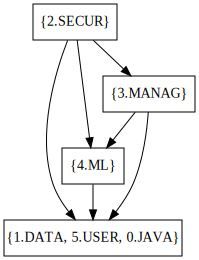

In [14]:
ranking = electre3.exploit(credibility_matrix)
ranking.graph_condensation.plot()

**(Answer)(Q7) **

Based on the  outputs, the ELECTRE III method's distillation processes have been applied to a set of alternatives, leading to the following insights:

- **Ascending Distillation**: The alternative `1.DATA` stands out as the most favorable option, as it has not been outranked by any other. This indicates a strong preference across the criteria for `1.DATA`, making it the top choice in this particular analysis.

- **Descending Distillation**: On the other hand, `2.SECUR` is identified as a robust alternative, indicating its ability to outrank other options in the set. This suggests that while `2.SECUR` might not be the top choice, it is considered a strong candidate when all criteria are taken into account.

- **Combined Exploitation**: The final partial pre-order combines both the ascending and descending distillations, placing `2.SECUR` at the top, followed by `3.MANAG`, `4.ML`, `0.JAVA`, and `5.USER`. `1.DATA`, despite being strong in the ascending distillation, appears alongside others, indicating a balance between its strengths and weaknesses compared to other alternatives.

The ELECTRE III outputs illustrate a refined decision-making process, integrating multiple criteria and their respective thresholds to determine the most suitable alternatives. These results demonstrate that no single alternative is perfect across all criteria, and the decision must consider the relative importance of each criterion. The plots and matrices reveal the complex interplay of preferences, allowing for a comprehensive evaluation beyond just numerical scores.

In conclusion, the use of ELECTRE III provides a sophisticated tool for multi-criteria decision analysis, presenting a structured and transparent way to navigate complex choice scenarios, with the final decision reflecting a balance of all considered factors.

Q8. Introduce a new job in the dataset above (the one defined in question 1). It must be very good in the 4 first criteria and very bad in the last criterion. Repeat the exercise and compare the results. Explain its relations in the credibility matrix and its position in the final ranking.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


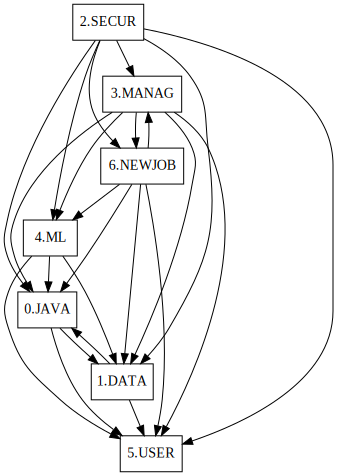

In [15]:
# Define the initial performance data and alternatives
performance_data = [
    [1600.0, 8, 2, 8.0, 3],
    [2100.0, 3, 1, 12.0, 6],
    [2400.0, 7, 3, 14.0, 7],
    [2700.0, 6, 2, 24.0, 3],
    [1700.0, 4, 2, 10.0, 9],
    [1100.0, 7, 1, 22.0, 1],

]
alternatives = ["0.JAVA", "1.DATA", "2.SECUR", "3.MANAG", "4.ML", "5.USER"]

# Add the new job's performance data
new_job_performance = [2900.0, 10, 3, 28, 1]
performance_data.append(new_job_performance)

# Add the new job to the alternatives list
alternatives.append("6.NEWJOB")

# Create a new PerformanceTable with the updated data
new_performance_table = PerformanceTable(
    performance_data,
    alternatives=alternatives,
    criteria=criteria,  # This should be defined as in your previous data
    scales=scales       # This should also be defined as in your previous data
)

# Instantiate a new Electre3 object if needed
new_electre3 = Electre3(
    criteria_weights=criteria,
    preference_thresholds=p,
    indifference_thresholds=q,
    veto_thresholds=v,
    alpha=0.3,
    beta=-0.15
)

# Recalculate ELECTRE III metrics with the new job included
new_concordance_matrix = new_electre3.concordance(new_performance_table)
new_discordance_matrix = new_electre3.discordance(new_performance_table)
new_credibility_matrix = new_electre3.construct(new_performance_table)

# Perform the ascending distillation with the new data
new_ascending = new_electre3.distillation(new_credibility_matrix, ascending=True)

# Perform the descending distillation with the new data
new_descending = new_electre3.distillation(new_credibility_matrix, ascending=False)

# Obtain the final ranking with the new data
new_final_ranking = new_electre3.exploit(new_credibility_matrix)


# or if it supports plotting directly
new_final_ranking.plot()


**(Explain)**

Upon introducing the new job (`6.NEWJOB`) and calculating the ELECTRE III method's outcomes, we observe that `6.NEWJOB` ranks well but does not surpass all existing alternatives, despite its high performance in the majority of criteria. This can be attributed to its very poor performance in the last criterion, which significantly affects its overall standing.

In the generated ranking graph:

- `2.SECUR` maintains the highest position, indicating it is the strongest overall choice considering all criteria.
- `6.NEWJOB` is in the middle tier alongside `3.MANAG`, showing that while it has significant strengths, its critical weakness in the last criterion prevents it from being the top option.
- `1.DATA`, `5.USER`, and `0.JAVA` are positioned lower in the hierarchy, suggesting they are less preferred compared to the new job and `3.MANAG`.

This outcome exemplifies the essence of multi-criteria decision analysis where each criterion's performance impacts the overall assessment. A single criterion with enough weight can significantly influence the final decision, demonstrating the necessity to perform well across all criteria or at least not have any extreme weaknesses.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q9. What happens if we change the thresholds as indicated below?
Run again and compare the credibility matrix and the ranking obtained with the ones of question 10.
Explain the results and the motivation of the changes.

In [16]:
#Indifference thresholds
q = {
    "Salary": 0,
    "Company": 0,
    "Internationalization": 0,
    "Duration": 0,
    "Topic": 0
}

#Preference thresholds
p = {
    "Salary": 300,
    "Company": 1,
    "Internationalization": 0,
    "Duration": 3,
    "Topic": 2
}

#Veto thresholds
v = {
    "Salary": 500,
    "Company": 3,
    "Internationalization": 2,
    "Duration": 5,
    "Topic": 3
}

,0.JAVA,1.DATA,2.SECUR,3.MANAG,4.ML,5.USER
0.JAVA,1.0,0.300000,0.200000,0.500000,0.566667,0.8
1.DATA,0.7,1.000000,0.166667,0.200000,0.500000,0.6
2.SECUR,0.8,1.000000,1.000000,0.500000,0.800000,0.8
3.MANAG,0.8,0.800000,0.500000,1.000000,0.800000,0.8
4.ML,0.8,0.566667,0.200000,0.300000,1.000000,0.6
5.USER,0.2,0.500000,0.400000,0.266667,0.400000,1.0


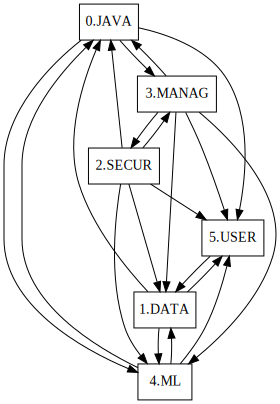

In [17]:
electre3 = Electre3(criteria_weights=criteria, preference_thresholds=p, indifference_thresholds=q, veto_thresholds=v, alpha=0.3, beta=-0.15)
concordance_matrix = electre3.concordance(performance_table)

display(concordance_matrix)

#Now we plot the graph of concordance with relations above the cut threshold
cut_threshold = 0.5
conc_mat_cut = concordance_matrix.where(concordance_matrix >= cut_threshold, other=0)
AdjacencyMatrix(conc_mat_cut).plot()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


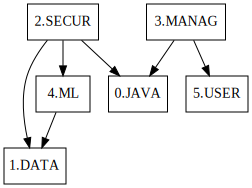

In [18]:
discordance_matrix = electre3.discordance(performance_table)
discordance_matrix
credibility_matrix = electre3.construct(performance_table)
credibility_matrix
credibility_cut = credibility_matrix.where(credibility_matrix > 0.5, other=0)
AdjacencyMatrix(credibility_cut).plot()


[['0.JAVA', '2.SECUR', '3.MANAG', '4.ML', '5.USER'], ['1.DATA']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


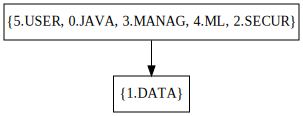

In [19]:
ascending = electre3.distillation(credibility_matrix, ascending=True)
print(ascending)
ascending_dist_matrix = OutrankingMatrix.from_ranked_categories(ascending)
ascending_dist_matrix.graph_condensation.plot()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['2.SECUR'], ['0.JAVA', '1.DATA', '3.MANAG', '4.ML', '5.USER']]


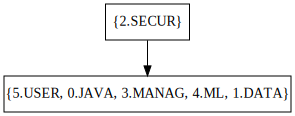

In [20]:
descending = electre3.distillation(credibility_matrix, ascending=False)
print(descending)
descending_dist_matrix = OutrankingMatrix.from_ranked_categories(descending)
descending_dist_matrix.graph_condensation.plot()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


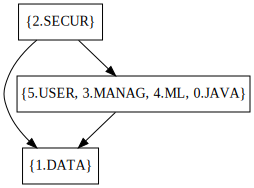

In [21]:
ranking = electre3.exploit(credibility_matrix)
ranking.graph_condensation.plot()


**(Answer)**

The results  obtained with the updated thresholds in ELECTRE III show the new rankings of the job offers after the distillation processes. From the displayed results, it appears that:

The updated ascending distillation (which ranks from the least to the most preferred options) includes two categories of rankings. The first category is composed of most job offers, indicating a general preference over the second category, which only contains '1.DATA'. This suggests that '1.DATA' is the least preferred job offer when considering the updated thresholds.

In the updated descending distillation (which ranks from the most to the least preferred options), '2.SECUR' is the most preferred job offer, outranking all others. The remaining job offers are placed in the second tier, with '1.DATA' again positioned alongside the majority of the options, indicating no strong outranking among them.

if we're to make a direct analysis from the updated results alone, we can conclude:

- The changing of thresholds has affected the relative standing of '1.DATA' most significantly, as it's now clearly differentiated from the rest of the job offers in both ascending and descending distillations.
- '2.SECUR' maintains a strong position, suggesting its performance is robust against the criteria even with the new thresholds.
- The grouping of the remaining job offers together in both distillations suggests there's no clear preference among them when the thresholds are applied.

This analysis demonstrates the sensitivity of multi-criteria decision-making processes to the parameters used, such as thresholds in the ELECTRE III method. Small changes in these parameters can lead to significant differences in the resulting rankings, which should be taken into consideration in the decision-making process.
